In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [3]:
mpl.rcParams['font.sans-serif'] = [u'simHei']
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
warnings.filterwarnings(action='ignore',  category=ConvergenceWarning)

In [5]:
#输出格式设置
np.random.seed(100)
np.set_printoptions(linewidth=1000,suppress=True)

In [6]:
N = 10
x = np.linspace(0,6,10) + np.random.randn(N)
y = 1.8*x**3 + x**2 - 14*x - 7 + np.random.randn(N)

x.shape = -1,1
y.shape = -1,1

In [7]:
#管道对象声明
models = [
    Pipeline([
        ('Poly',PolynomialFeatures(include_bias=True)),
        ('Linear', LinearRegression(fit_intercept=False))
    ]),
    Pipeline([
        ('Poly',PolynomialFeatures(include_bias=True)),
        ('Linear', RidgeCV(alphas = np.logspace(-3,2,50),fit_intercept=False))
    ]),
    Pipeline([
        ('Poly',PolynomialFeatures(include_bias=True)),
        ('Linear', LassoCV(alphas=np.logspace(0,1,10), fit_intercept=False))
    ]),
    Pipeline([
        ('Poly',PolynomialFeatures(include_bias=True)),
        ('Linear', ElasticNetCV(alphas=np.logspace(0,1,10), l1_ratio=[0.1,0.5,0.7,0.9,0.95,1],
                                fit_intercept=False))
    ])    
]

In [8]:
plt.figure(facecolor='w')
#高次设置
degree = np.arange(1,N,4)

<Figure size 432x288 with 0 Axes>

In [9]:
dm = degree.size
colors = []
for c in np.linspace(16711680,255,dm):
    colors.append('#%06x' % int(c))

1阶，系数位：  [-44.14102611  40.05964256]
5阶，系数位：  [ -5.60899679 -14.80109301   0.75014858   2.11170671  -0.07724668   0.00566633]
9阶，系数位：  [-2465.58381316  6108.63817712 -5111.99333504   974.74974891  1078.89649478  -829.50277842   266.13230658   -45.71741587     4.1158274     -0.15281063]


C:\Users\Administrator\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


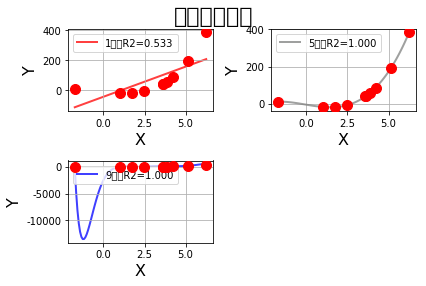

In [10]:
model = models[0]
for i,d in enumerate(degree):
    plt.subplot(int(np.ceil(dm/2.0)),2,i+1)
    #真实数据绘制
    plt.plot(x,y,'ro',ms=10,zorder=N)
    
    #利用管道模型
    model.set_params(Poly__degree=d)
    model.fit(x,y.ravel())
    
    lin = model.get_params()['Linear']
    #拼凑输出字符串
    output = u'%d阶，系数位： ' % (d)
    print(output, lin.coef_.ravel())
    
    #绘制拟合直线
    x_hat = np.linspace(x.min(),x.max(), num=100)
    x_hat.shape = -1,1
    y_hat = model.predict(x_hat)
    
    #拟合分数
    s = model.score(x,y)
    
    #可视化预测数据
    z = N-1 if (d==5) else 0
    label = u'%d阶，R2=%.3f' % (d,s)
    plt.plot(x_hat,y_hat,color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
    
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.xlabel('X',fontsize=16)
    plt.ylabel('Y',fontsize=16)
    
plt.tight_layout(1,rect=(0,0,1,0.95))
plt.suptitle(u'线性回归拟合', fontsize=22)
plt.show()

In [11]:
#控制degree为1,3,5,7,9
plt.figure(facecolor='w')
degree = np.arange(1,N,2)

#设置颜色
dm = degree.size
colors = []
for c in np.linspace(16711680,255,dm):
    colors.append('#%06x' % int(c))
    
titles = [u'线性回归', u'Ridge回归', u'Lasso回归', u'ElasticNet回归']

<Figure size 432x288 with 0 Axes>

1阶，系数为：  [-44.14102611  40.05964256]
3阶，系数为：  [ -6.80525963 -13.743068     0.93453895   1.79844791]
5阶，系数为：  [ -5.60899679 -14.80109301   0.75014858   2.11170671  -0.07724668   0.00566633]
7阶，系数为：  [-41.70721172  52.38570529 -29.56451338  -7.66322829  12.07162703  -3.86969096   0.53286096  -0.02725536]
9阶，系数为：  [-2465.58381316  6108.63817712 -5111.99333504   974.74974891  1078.89649478  -829.50277842   266.13230658   -45.71741587     4.1158274     -0.15281063]
1阶，alpha=9.540955, 系数为：  [-6.71593385 29.79090057]
3阶，alpha=0.005179, 系数为：  [ -6.7819845  -13.73679293   0.92827639   1.79920954]
5阶，alpha=39.069399, 系数为：  [-0.82920155 -1.07244754 -1.41803017 -0.93057536  0.88319116 -0.07073168]
7阶，alpha=9.540955, 系数为：  [-1.62586368 -2.18512108 -1.82690987 -2.27495708  0.98685071  0.30551091 -0.10988434  0.00846908]
9阶，alpha=0.021210, 系数为：  [-10.50566712  -6.12564342  -1.96421973   0.80200162   0.59148104  -0.23358238   0.20296996  -0.0810983    0.01325045  -0.00077212]
1阶，alpha=10.000000, 系数为： 

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' ins

7阶，alpha=10.000000, 系数为：  [-0.         -0.         -0.43065154 -0.5204792   0.41572336  0.01070983 -0.00095092 -0.00040942]
9阶，alpha=1.000000, 系数为：  [ -2.30227736 -11.67121674  -0.           1.49333897   0.0762381    0.0029096   -0.00013387  -0.00003958  -0.00000647  -0.00000088]
1阶，alpha=1.000000, l1_ratio=0.500000, 系数为：  [-12.87691494  32.00694374]
3阶，alpha=1.000000, l1_ratio=0.700000, 系数为：  [ -1.29062225 -10.69750471  -0.99653256   2.00624245]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


5阶，alpha=1.668101, l1_ratio=1.000000, 系数为：  [ -0.         -12.26394605  -0.50309544   1.78132292   0.06461552  -0.00564319]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


7阶，alpha=10.000000, l1_ratio=0.900000, 系数为：  [-0.         -0.         -0.50228012 -0.5192211   0.42311807  0.00990189 -0.0009666  -0.00040993]


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


9阶，alpha=10.000000, l1_ratio=0.100000, 系数为：  [-0.26991047 -0.59594416 -0.51042742 -0.4872618   0.40686008  0.00816424  0.00001617 -0.00016118 -0.0000254  -0.00000376]


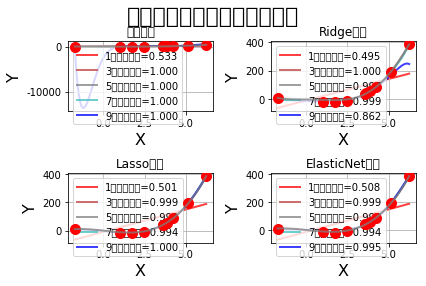

In [13]:
#最外层循环，是模型，共4个模型
for t in range(4):
    model = models[t]
    
    #绘制真实点
    plt.subplot(2,2,t+1)
    plt.plot(x,y,'ro',ms=10,zorder=N-1)
    
    #遍历所有阶数，绘制一张子图
    for i,d in enumerate(degree):
        #设置degree参数，拟合模型
        model.set_params(Poly__degree=d)
        model.fit(x,y.ravel())
        
        #获取参数
        lin = model.get_params()['Linear']
        output = u'%d阶，系数为： ' % (d)
        
        #判断有没有一些属性
        if hasattr(lin, 'alpha_'):
            idx = output.find(u'系数')
            output = output[:idx] + (u'alpha=%.6f, ' % lin.alpha_) + output[idx:]
        if hasattr(lin, 'l1_ratio_'):
            idx = output.find(u'系数')
            output = output[:idx] + (u'l1_ratio=%.6f, ' % lin.l1_ratio_) + output[idx:]
            
        print(output, lin.coef_.ravel())
        
        #构造模拟数据
        x_hat = np.linspace(x.min(),x.max(), num=100)
        x_hat.shape = -1,1
        y_hat = model.predict(x_hat)
        
        #拟合分数
        s = model.score(x,y)
        
        #可视化预测数据
        z = N-1 if (d==5) else 0
        label = u'%d阶，正确率=%.3f' % (d,s)
        plt.plot(x_hat,y_hat,color=colors[i], lw=2, alpha=0.75, label=label, zorder=z)
        
    #设置子图可视化细节
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.title(titles[t])
    plt.xlabel('X',fontsize=16)
    plt.ylabel('Y',fontsize=16)
    
#整体大图可视化设置
plt.tight_layout(1,rect=(0,0,1,0.95))
plt.suptitle(u'各种不同线性回归过拟合显示', fontsize=22)
plt.show()